##  Analyse des Résultats du semi marathon de paris

In [133]:
from pandas import * # pour manipuler des tableaux de données 
from numpy import *  # pour faire du calcul numérique
from matplotlib.pylab import * # pour tracer des graphiques
from datetime import datetime,timedelta
from matplotlib.ticker import MaxNLocator

####  Définition de functions utilitaires

In [83]:

def ACP(M):
    """
    Perform Principal Component Analysis (PCA) on the input matrix.

    Parameters:
    - M (numpy.ndarray): Input matrix for PCA.

    Returns:
    - R (numpy.ndarray): Covariance matrix of the standardized matrix.
    - val2 (numpy.ndarray): Sorted eigenvalues in descending order.
    - P2 (numpy.ndarray): Sorted eigenvectors corresponding to sorted eigenvalues.
    - transformed_matrix (numpy.ndarray): Transformed matrix using the sorted eigenvectors.
    """
    n,p=M.shape
    Z=zeros((n,p))
    for j in range(p):
        Z[:,j]=(M[:,j]-mean(M[:,j]))/std(M[:,j])
    R=dot(Z.T,Z)/n
    val,P=eigh(R)
    val2 = sort(val)[::-1]
    ind  = argsort(val)[::-1]
    P2 = zeros((p,p))
    for j in range(p):
        P2[:,j]=P[:,ind[j]]
    return R, val2, P2, dot(Z,P2)  

def string_to_time(time_str):
    time_format = "%H:%M:%S"
    return datetime.strptime(time_str, time_format)

def get_seconds(datet,date_day):
    return (datet - date_day).total_seconds()

vectorized_string_to_datetime = np.vectorize(string_to_time)




In [4]:
df = read_excel('semi-de-paris.xlsx')

####  Moyenne et mediane de la vitesse durant le semi de paris 2024

In [ ]:
print(f"vitesse moyenne {mean(df['average speed'])}")

####  age en fonction des résultats au semi marathon de paris

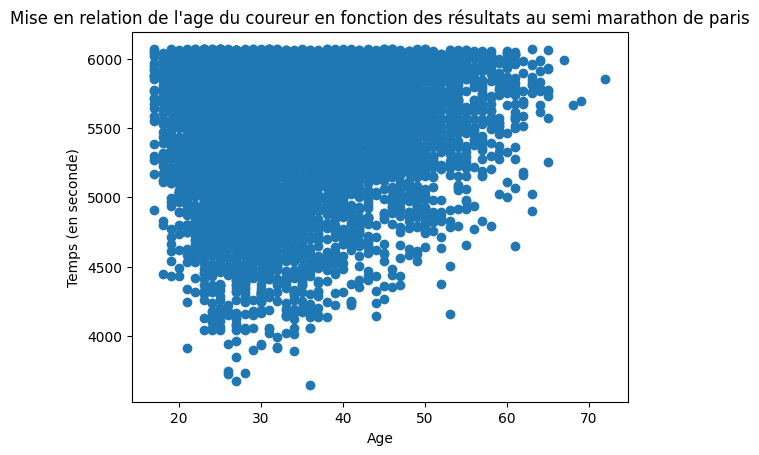

In [145]:
data = df.values
limit = 10000
time = vectorized_string_to_datetime(data[:limit,6])
timedelta = [get_seconds(t.replace(month=3, year=2024, day=3),datetime(2024, 3, 3)) for t in time]
ages = (data[:limit,3])
title('Mise en relation de l\'age du coureur en fonction des résultats au semi marathon de paris')
xlabel('Age')
ylabel('Temps (en seconde)')
scatter(ages,timedelta)



Text(0, 0.5, 'distance (en km)')

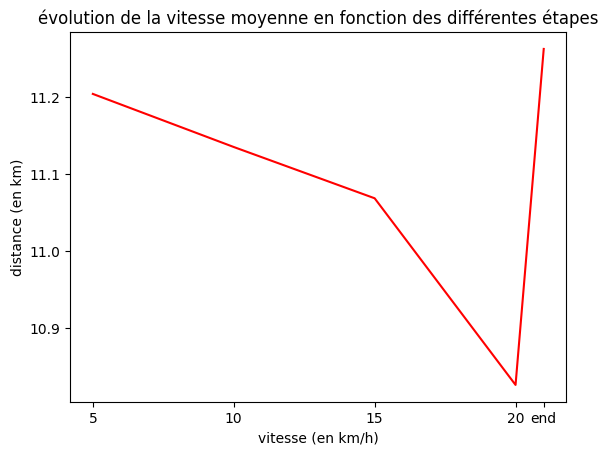

In [164]:
names = ["5 km speed","10 km speed","15 km speed","20 km speed","finish speed"]
labels = ["5","10","15","20","end"]
speeds = [mean(df[name]) for name in names]
steps = [0,1,2,3,3.2]

plot(steps,speeds, color='red', label='Sinus')

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticks(steps)
ax.set_xticklabels( labels)

title('évolution de la vitesse moyenne en fonction des différentes étapes')
ylabel('vitesse (en km/h)')
xlabel('distance (en km)')

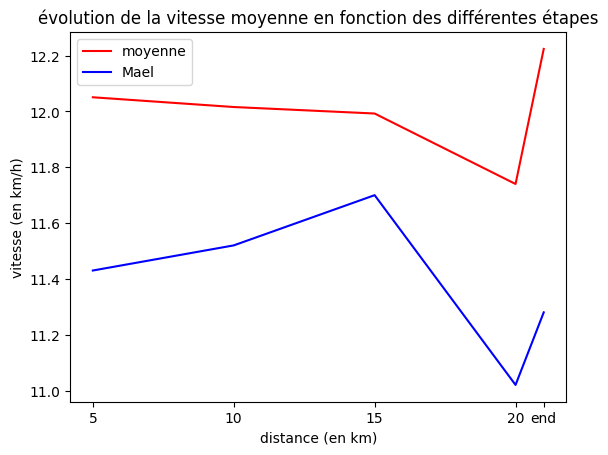

In [181]:
def compareSpeed(df,firstname,lastname,category ='Overall'):
    result = df.loc[(df['firstname'] == firstname) & (df['lastname'] == lastname)]
    filtered_df = df.loc[df[category].notna()]
    names = ["5 km speed","10 km speed","15 km speed","20 km speed","finish speed"]
    labels = ["5","10","15","20","end"]
    speeds = [mean(filtered_df[name]) for name in names]
    speedsUser = [mean(result[name]) for name in names]
    steps = [0,1,2,3,3.2]

    plot(steps,speeds, color='red', label= 'moyenne')
    plot(steps,speedsUser, color='blue', label=firstname)
    legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xticks(steps)
    ax.set_xticklabels( labels)

    title('évolution de la vitesse moyenne en fonction des différentes étapes')
    ylabel('vitesse (en km/h)')
    xlabel('distance (en km)')

compareSpeed(df,'Mael','CHANON','SEH')